In [1]:
# The Python standard library includes some functionality for communicating
# over the Internet.
# However, we will use a more powerful and simpler library called requests.
# This is external library that you may need to install first.
import requests
import json

def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )

    # The response we get back is an object with several fields.
    # The actual contents we care about are in its text field:
    text = response.text
    # To understand the structure of this text, you may want to save it
    # to a file and open it in VS Code or a browser.
    # See the README file for more information.
    ...

    # We need to interpret the text to get values that we can work with.
    # What format is the text in? How can we load the values?
    return json.loads(text)


# With all the above functions defined, we can now call them and get the result
data = get_data()

#print(f"Loaded {count_earthquakes(data)}")
# max_magnitude, max_location = get_maximum(data)
# print(f"The strongest earthquake was at {max_location} with magnitude {max_magnitude}")

In [2]:
data.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [3]:
data.get("metadata").get("count")

120

In [4]:
data.get("features")

[{'type': 'Feature',
  'properties': {'mag': 2.6,
   'place': '12 km NNW of Penrith, United Kingdom',
   'time': 956553055700,
   'updated': 1415322596133,
   'tz': None,
   'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
   'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
   'felt': None,
   'cdi': None,
   'mmi': None,
   'alert': None,
   'status': 'reviewed',
   'tsunami': 0,
   'sig': 104,
   'net': 'us',
   'code': 'p0009rst',
   'ids': ',usp0009rst,',
   'sources': ',us,',
   'types': ',impact-text,origin,phase-data,',
   'nst': None,
   'dmin': None,
   'rms': None,
   'gap': None,
   'magType': 'ml',
   'type': 'earthquake',
   'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
  'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
  'id': 'usp0009rst'},
 {'type': 'Feature',
  'properties': {'mag': 4,
   'place': '1 km WSW of Warwick, United Kingdom',
   'time': 969683025790,
   'updated'

In [5]:
type(data.get("features"))

list

In [6]:
type(data.get("features")[0].get("properties"))

dict

In [7]:
type(data.get("features").get("geometry"))

AttributeError: 'list' object has no attribute 'get'

In [ ]:
list_of_mags = [dict.get("properties").get("mag") for dict in data.get("features")]

In [ ]:
list_of_coords = [dict.get("geometry").get("coordinates") for dict in data.get("features")]
lat_lon_only = [coords[0:2] for coords in list_of_coords]

In [ ]:
for dict in data.get("features"):
    #print(type(dict.get("geometry").get("coordinates")))
    #print(type(dict.get("properties").get("mag")))

    print(([dict.get("properties").get("mag")]+dict.get("geometry").get("coordinates"))[0:3])
    

[2.6, -2.81, 54.77]
[4, -1.61, 52.28]
[4, 1.564, 53.236]
[3.3, 0.872, 58.097]
[2.9, -1.845, 51.432]
[2.9, -3.639, 55.102]
[4, -4.684, 50.995]
[2.6, 1.144, 51.76]
[2.6, 1.094, 51.332]
[3.5, -3.205, 51.552]
[2.5, -3.25, 51.7]
[4.2, -0.856, 52.846]
[3, -3.14, 51.63]
[3.4, 1.288, 53.168]
[3.5, -3.255, 51.7]
[3.4, -3.081, 51.567]
[3, -0.009, 50.048]
[2.3, -5.749, 56.596]
[2.1, -3.588, 51.713]
[4.8, -2.15, 52.52]
[3.2, -2.136, 52.522]
[1.2, -2.138, 52.521]
[3.7, -2, 53.475]
[4.3, -2.219, 53.478]
[2.9, -2.219, 53.463]
[3.5, -2.146, 53.473]
[3.3, -2.157, 53.477]
[3.8, -2.179, 53.485]
[2.8, -2.197, 53.482]
[2.5, -2.204, 53.481]
[2.5, -2.213, 53.488]
[2.6, -2.188, 53.477]
[3.1, -2.198, 53.481]
[2.3, 1.582, 51.055]
[3, -4.416, 56.169]
[2.8, -4.439, 56.181]
[2.5, -4.427, 56.167]
[3.2, -1.013, 53.481]
[3.3, -2.98, 51.089]
[3.6, -2.98, 51.089]
[3.7, -2.98, 51.089]
[3.4, -1.999, 53.566]
[2.7, 0.765, 58.146]
[3, -0.602, 53.936]
[3.8, -3.853, 53.265]
[2.6, -2.055, 53.092]
[2.9, -0.392, 51.008]
[3, -5.2

In [ ]:
mag_lon_lat = [(([dict.get("properties").get("mag")]+dict.get("geometry").get("coordinates"))[0:3]) for dict in data.get("features")]

In [ ]:
sorted(mag_lon_lat,reverse=True)

[[4.8, -0.332, 53.403],
 [4.8, -2.15, 52.52],
 [4.6, 1.009, 51.085],
 [4.3, -2.219, 53.478],
 [4.3, -3.8559, 51.7231],
 [4.2, -0.856, 52.846],
 [4.1, 0.0603, 53.7927],
 [4.1, -4.164, 51.363],
 [4, 1.564, 53.236],
 [4, -1.61, 52.28],
 [4, -4.684, 50.995],
 [3.9, -0.743, 50.122],
 [3.9, -2.512, 52.212],
 [3.8, -0.717, 52.727],
 [3.8, -2.179, 53.485],
 [3.8, -3.853, 53.265],
 [3.8, -4.719, 52.883],
 [3.8, -5.7295, 56.8378],
 [3.7, 1.438, 51.304],
 [3.7, -2, 53.475],
 [3.7, -2.98, 51.089],
 [3.7, -3.017, 54.167],
 [3.6, 0.998, 53.666],
 [3.6, -1.652, 54.169],
 [3.6, -2.98, 51.089],
 [3.6, -3.634, 55.085],
 [3.5, 1.178, 51.116],
 [3.5, -0.732, 52.722],
 [3.5, -2.146, 53.473],
 [3.5, -3.146, 54.39],
 [3.5, -3.205, 51.552],
 [3.5, -3.255, 51.7],
 [3.5, -5.557, 56.829],
 [3.5, -5.784, 56.822],
 [3.4, 1.288, 53.168],
 [3.4, -1.999, 53.566],
 [3.4, -3.081, 51.567],
 [3.3, 0.872, 58.097],
 [3.3, -2.157, 53.477],
 [3.3, -2.98, 51.089],
 [3.3, -3.277, 52.866],
 [3.2, -1.013, 53.481],
 [3.2, -2.136,

In [30]:
import datetime
time_in_s = mag_lon_lat = [dict.get("properties").get("time") for dict in data.get("features")]
sorted(time_in_s)

#the frequency (number) of earthquakes per year , %H:%M strftime('%Y/%m/%d') 
time_humanfriendly = [datetime.datetime.fromtimestamp((dict.get("properties").get("time"))/1000).strftime('%Y') for dict in data.get("features")]
print(max(time_humanfriendly),min(time_humanfriendly))


2018 2000


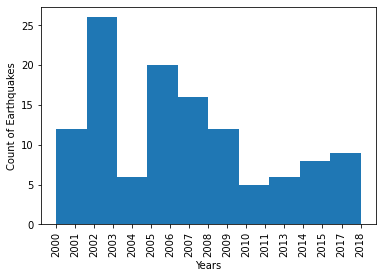

In [34]:
import matplotlib.pyplot as plt
import numpy as np


x = time_humanfriendly

#fig=plt.figure(figsize=(80,10))
plt.xticks(rotation = 'vertical')
plt.hist(x, density=False)  # density=False would make counts
plt.ylabel('Count of Earthquakes')
plt.xlabel('Years');

<AxesSubplot:xlabel='years'>

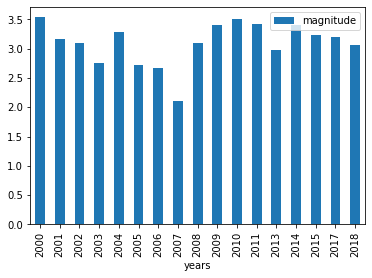

In [93]:
#the average magnitude of earthquakes per year
import pandas as pd

magnitude_and_years = [(  [dict.get("properties").get("mag")]   +   [datetime.datetime.fromtimestamp((dict.get("properties").get("time"))/1000).strftime('%Y')]  ) for dict in data.get("features")]
magnitude_and_years

mag_years_df = pd.DataFrame(magnitude_and_years, columns=["magnitude","years"])
mag_years_df_grouped = mag_years_df.groupby(["years"]).mean()
mag_years_df_grouped.plot(kind = "bar")


In [ ]:

grouped = s.groupby(s)

In [41]:
years_q2 = [datetime.datetime.fromtimestamp((dict.get("properties").get("time"))/1000).strftime('%Y') for dict in data.get("features")]
np_years_q2 = np.array(years_q2)
years_q2_set = set(years_q2)
np_years_q2

#group by 


array(['2000', '2000', '2000', '2001', '2001', '2001', '2001', '2001',
       '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002',
       '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002',
       '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002',
       '2002', '2003', '2003', '2003', '2003', '2003', '2004', '2004',
       '2004', '2004', '2004', '2004', '2005', '2005', '2005', '2005',
       '2005', '2005', '2005', '2005', '2005', '2005', '2006', '2006',
       '2006', '2006', '2006', '2006', '2006', '2006', '2006', '2006',
       '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007',
       '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007',
       '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008',
       '2008', '2009', '2009', '2009', '2010', '2011', '2011', '2011',
       '2011', '2013', '2013', '2013', '2013', '2013', '2013', '2014',
       '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2017',
      